<a href="https://colab.research.google.com/github/jpedrocf/AAAvsIndie/blob/main/MVPDataScienceGamesOrdered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science MVP - Top Revenue Games in 2024 (STEAM)

---

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import matplotlib.ticker as ticker
from matplotlib import cm
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

custom_palette = {'AAA': '#C98536', 'Indie': '#08306b'}

## Dataset Load


---


In [2]:
# GitHub raw URL
url = 'https://raw.githubusercontent.com/jpedrocf/AAAvsIndie/main/Steam_2024_bestRevenue_1500.csv'

gamesdf = pd.read_csv(url)

gamesdf.head(15)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
5,Soulmask,30-05-2024,304685,29.99,7540563.0,95.697813,79,Indie,Qooland Games,CampFire Studio,2646460
6,The Universim,22-01-2024,328945,29.99,7534369.0,16.868531,81,Indie,Crytivo,Crytivo,352720
7,Bellwright,23-04-2024,280955,29.99,7481940.0,41.418885,78,Indie,"Donkey Crew,Snail Games USA",Donkey Crew,1812450
8,Night of the Dead,31-05-2024,394364,29.99,7091792.0,27.597072,79,Indie,Jackto Studios,Jackto Studios,1377380
9,Empires of the Undergrowth,07-06-2024,408292,29.99,6950952.0,38.602124,95,AA,"Hooded Horse,Slug Disco",Slug Disco,463530


## Checking the columns range for outliers


In [3]:
gamesdf.describe()

,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId
count,1.500000e+03,1500.000000,1.500000e+03,1500.000000,1500.000000,1.500000e+03
mean,1.414826e+05,17.519513,2.632382e+06,12.562704,76.201333,2.183788e+06
std,1.132757e+06,12.646612,2.781024e+07,21.542173,24.319438,6.067725e+05
min,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,2.488000e+04
25%,4.918750e+03,9.990000,4.550425e+04,3.564848,72.000000,1.792795e+06
50%,1.192850e+04,14.990000,1.090530e+05,6.762776,83.000000,2.321985e+06
75%,3.786975e+04,19.990000,4.551568e+05,13.104473,92.000000,2.693228e+06
max,3.073915e+07,99.990000,8.377934e+08,296.332852,100.000000,3.107330e+06


## Null Checking

In [4]:
gamesdf.duplicated().sum()

0

In [5]:
gamesdf.isna().sum()

,0
name,0
releaseDate,0
copiesSold,0
price,0
revenue,0
avgPlaytime,0
reviewScore,0
publisherClass,0
publishers,1
developers,2


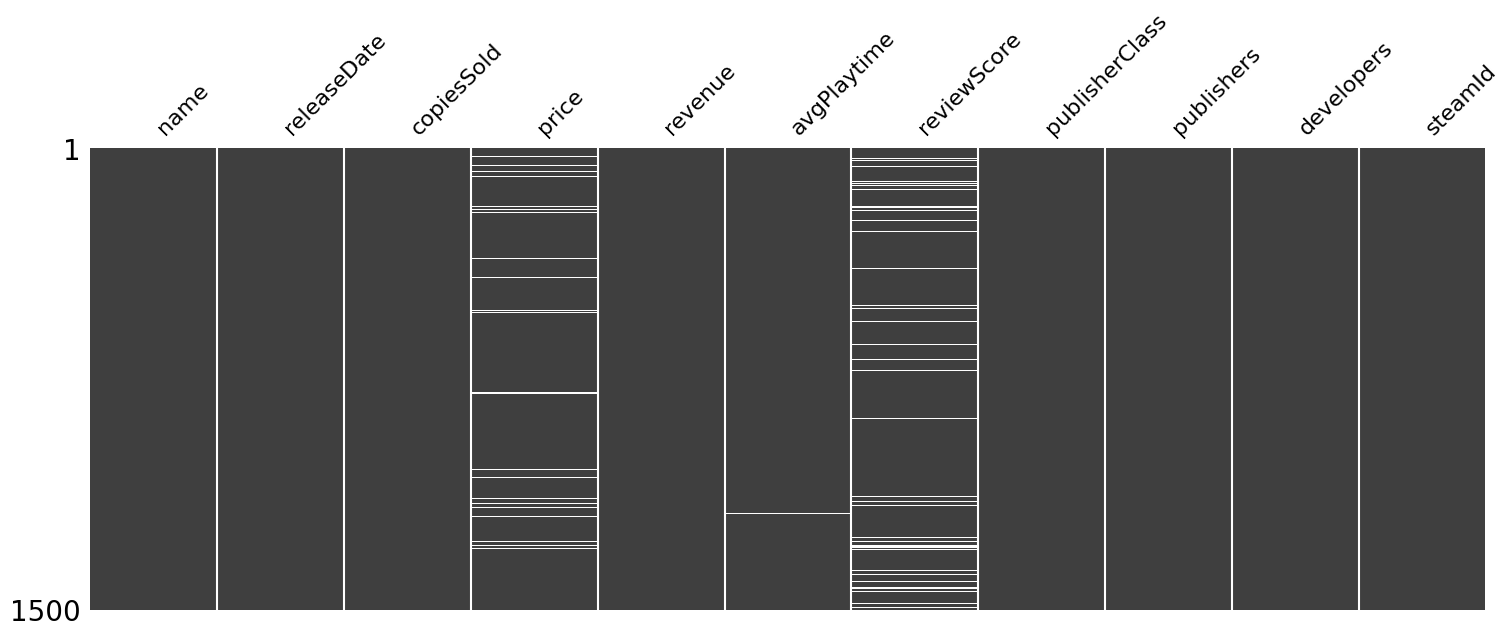

In [6]:
col = list(gamesdf.columns)

lcmsn = gamesdf[col[:]]

lcmsn.replace(0, np.nan, inplace=True)

fig, ax = plt.subplots(figsize=(18, 6))

ms.matrix(lcmsn, ax=ax)

plt.show()

The Price column contains some values of 0, which are not null. These zero values represent free games included in the dataset. Free games are intentionally listed with a price of 0, reflecting their availability without cost to the player. This distinction is important to understand the pricing structure within the dataset and does not indicate missing or incomplete data.

In [7]:
mean_review_score = gamesdf['reviewScore'][gamesdf['reviewScore'] != 0].mean()

gamesdf['reviewScore'].replace(0, mean_review_score, inplace=True)

In [8]:
mean_avg_playtime = gamesdf['avgPlaytime'][gamesdf['avgPlaytime'] != 0].mean()

gamesdf['avgPlaytime'].replace(0, mean_avg_playtime, inplace=True)

In the reviewScore and avgPlaytime columns, zeros were replaced with the mean of the non-zero values. This adjustment was made to avoid skewing the analysis of game ratings and average playtime by treating zeros as missing or anomalous data. Replacing zeros with the mean ensures that the data more accurately reflects typical values, providing a more balanced view of the dataset and improving the reliability of subsequent analyses.

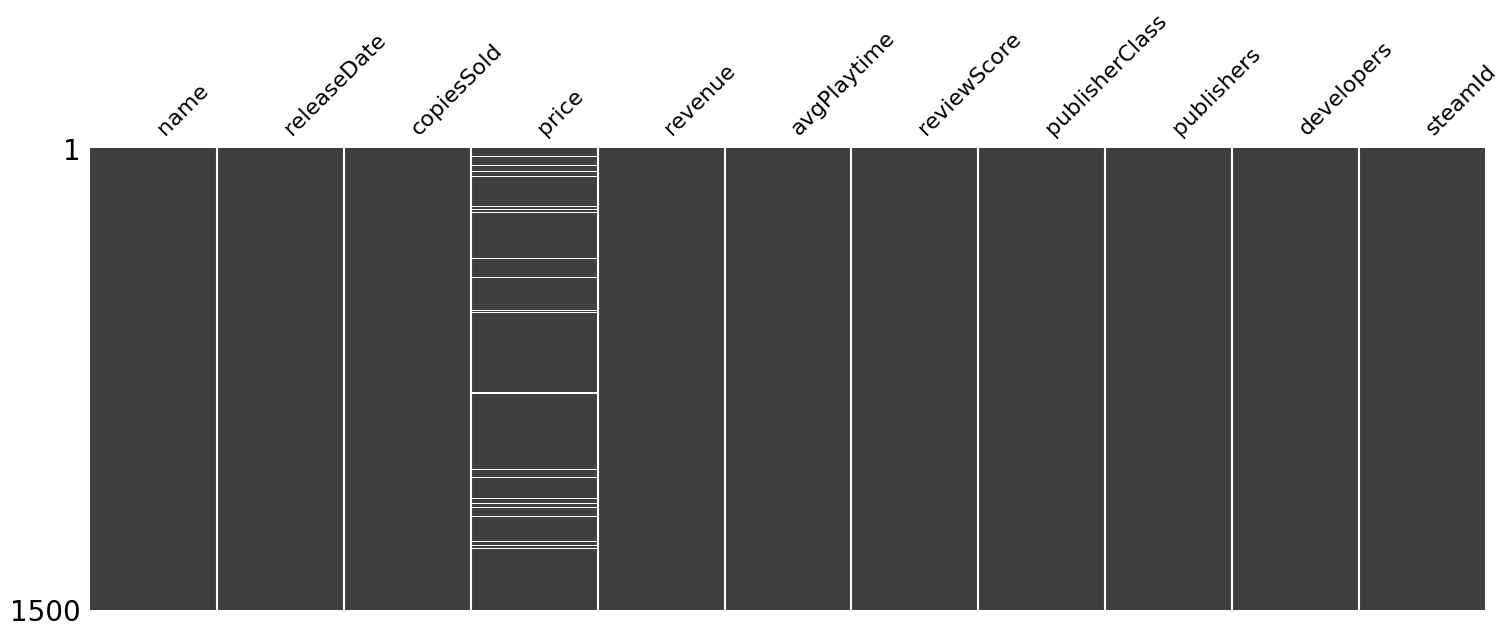

In [9]:
col = list(gamesdf.columns)

lcmsn = gamesdf[col[:]]

lcmsn.replace(0, np.nan, inplace=True)

fig, ax = plt.subplots(figsize=(18, 6))

ms.matrix(lcmsn, ax=ax)

plt.show()

## Date type correction

In [10]:
gamesdf['releaseDate'] = pd.to_datetime(gamesdf['releaseDate'],format='%d-%m-%Y')
gamesdf

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.365140,71.0,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.651061,57.0,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.452593,88.0,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.797817,76.0,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.258496,96.0,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,2024-04-11,452146,24.99,8739530.0,14.494432,73.0,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,2024-06-07,2640903,0.00,8706135.0,31.974027,74.0,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,2024-05-20,501474,34.99,8641459.0,11.891152,88.0,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,2024-08-28,156339,59.99,8440898.0,14.733899,81.0,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


## Creating Dataframes (AAA and Indie)

In [11]:
gamesdf = gamesdf[(gamesdf['publisherClass'] == 'AAA') | (gamesdf['publisherClass'] == 'Indie')]

In [12]:
gamesdf_aaa = gamesdf[gamesdf['publisherClass'] == 'AAA']
gamesdf_indie = gamesdf[gamesdf['publisherClass'] == 'Indie']

In [13]:
gamesdf_aaa.describe()

,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId
count,52,5.200000e+01,52.000000,5.200000e+01,52.000000,52.000000,5.200000e+01
mean,2024-05-02 08:46:09.230769152,6.571194e+05,33.453269,3.051149e+07,16.641400,77.456885,2.229166e+06
min,2024-01-24 00:00:00,2.168000e+03,0.000000,2.599100e+04,1.964214,11.000000,2.488000e+04
25%,2024-03-07 00:00:00,2.446325e+04,4.990000,2.660132e+05,7.805818,70.250000,2.183008e+06
50%,2024-04-22 00:00:00,4.316050e+04,29.990000,9.288620e+05,12.141420,83.000000,2.380345e+06
75%,2024-06-17 00:00:00,1.215828e+05,59.990000,3.253030e+06,20.774983,90.250000,2.721650e+06
max,2024-09-05 00:00:00,1.551728e+07,99.990000,8.377934e+08,60.823722,98.000000,2.878980e+06
std,NaN,2.676021e+06,27.123863,1.299534e+08,13.300591,17.741189,6.838024e+05


In [14]:
gamesdf_indie.describe()

,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId
count,1301,1.301000e+03,1301.000000,1.301000e+03,1301.000000,1301.000000,1.301000e+03
mean,2024-05-05 05:16:33.389700352,8.496561e+04,15.436695,6.741196e+05,12.053672,81.903775,2.223030e+06
min,2024-01-01 00:00:00,7.000000e+02,0.000000,2.072300e+04,0.549644,15.000000,2.697700e+05
25%,2024-03-08 00:00:00,4.565000e+03,8.990000,4.218000e+04,3.281796,76.000000,1.843540e+06
50%,2024-05-03 00:00:00,1.021700e+04,14.990000,9.079500e+04,6.327124,84.000000,2.377410e+06
75%,2024-06-26 00:00:00,2.957100e+04,19.990000,3.111270e+05,12.145730,92.000000,2.707930e+06
max,2024-09-06 00:00:00,3.073915e+07,59.990000,3.453056e+07,296.332852,100.000000,3.107330e+06
std,NaN,8.915177e+05,9.667706,2.491655e+06,22.380015,13.091821,5.909429e+05


In [15]:
gamesdf_indie[gamesdf_indie['price'] == 0].count()

,0
name,73
releaseDate,73
copiesSold,73
price,73
revenue,73
avgPlaytime,73
reviewScore,73
publisherClass,73
publishers,73
developers,73


## Checking the top 5 (price, copiesSold, revenue, avgPlaytime, reviewScore and publisher by revenue) - AAA

In [16]:
gamesdf_aaa[['name', 'price']].sort_values(by='price', ascending=False).head(5)

,name,price
0,WWE 2K24,99.99
597,The Crew Motorfest,69.99
1482,NBA 2K25,69.99
1481,F1® 24,69.99
1463,TEKKEN 8,69.99


In [17]:
gamesdf_aaa[['name', 'copiesSold']].sort_values(by='copiesSold', ascending=False).head(5)

,name,copiesSold
1450,Black Myth: Wukong,15517278
1451,HELLDIVERS™ 2,11905198
1454,Dragon's Dogma 2,1785028
1461,Ghost of Tsushima DIRECTOR'S CUT,925123
1463,TEKKEN 8,734722


In [18]:
gamesdf_aaa[['name', 'revenue']].sort_values(by='revenue', ascending=False).head(5)

,name,revenue
1450,Black Myth: Wukong,837793356.0
1451,HELLDIVERS™ 2,435635596.0
1454,Dragon's Dogma 2,111478291.0
1461,Ghost of Tsushima DIRECTOR'S CUT,49948315.0
1463,TEKKEN 8,45285110.0


In [19]:
gamesdf_aaa[['name', 'avgPlaytime']].sort_values(by='avgPlaytime', ascending=False).head(5)

,name,avgPlaytime
1463,TEKKEN 8,60.823722
562,Millennia,49.304170
1471,Horizon Forbidden West™ Complete Edition,47.249760
0,WWE 2K24,42.365140
38,Apollo Justice: Ace Attorney Trilogy,40.024307


In [20]:
gamesdf_aaa[['name', 'reviewScore']].sort_values(by='reviewScore', ascending=False).head(5)

,name,reviewScore
1183,Ace Attorney Investigations Collection,98.0
1450,Black Myth: Wukong,96.0
253,Dungeon Keeper™ 2,96.0
839,Sid Meier's Alpha Centauri™ Planetary Pack,95.0
611,Dungeon Keeper Gold™,95.0


In [21]:
gamesdf_aaa.groupby('publishers')[['revenue']].sum().sort_values(by='revenue', ascending=False).head(5)

,revenue
publishers,
Game Science,837793356.0
PlayStation Publishing LLC,508885199.0
"CAPCOM Co., Ltd.",117881025.0
Bandai Namco Entertainment,45552937.0
Electronic Arts,21635263.0


## Checking the top 5 (price, copiesSold, revenue, avgPlaytime, reviewScore and publisher by revenue) - Indie

In [22]:
gamesdf_indie[['name', 'price']].sort_values(by='price', ascending=False).head(5)

,name,price
1,EARTH DEFENSE FORCE 6,59.99
1304,Train Capacity 300%,59.99
579,TopSpin 2K25,59.99
365,TOKYO PSYCHODEMIC,54.99
856,GOBLIN SLAYER -ANOTHER ADVENTURER- NIGHTMARE F...,54.99


In [23]:
gamesdf_indie[['name', 'copiesSold']].sort_values(by='copiesSold', ascending=False).head(5)

,name,copiesSold
1403,Banana,30739148
1466,Once Human,5709407
1477,Chained Together,3946801
1496,Dark and Darker,2640903
1470,Supermarket Simulator,2514219


In [24]:
gamesdf_indie[['name', 'revenue', 'price']].sort_values(by='revenue', ascending=False).head(5)

,name,revenue,price
1466,Once Human,34530561.0,0.00
1467,Gray Zone Warfare,34030740.0,34.99
1468,Blade and Sorcery,31266686.0,29.99
1470,Supermarket Simulator,26020639.0,12.99
1472,The Planet Crafter,21286732.0,23.99


In [25]:
gamesdf_indie[['name', 'avgPlaytime']].sort_values(by='avgPlaytime', ascending=False).head(5)

,name,avgPlaytime
1479,Firestone: Online Idle RPG,296.332852
841,洪荒：我挂机成圣,271.614628
117,江湖客栈-The Jianghu,260.340509
1167,Farmer Against Potatoes Idle,256.335003
567,吞食天地2：誕生Reborn,239.439797


In [26]:
gamesdf_indie[['name', 'reviewScore']].sort_values(by='reviewScore', ascending=False).head(5)

,name,reviewScore
949,Mirage Feathers,100.0
965,Speed Crew,100.0
1053,Lilja and Natsuka Painting Lies,100.0
257,DEVIL BLADE REBOOT,100.0
1030,Dünnes Eis - Das Spiel zum Song,100.0


In [27]:
gamesdf_indie.groupby('publishers')[['revenue']].sum().sort_values(by='revenue', ascending=False).head(5)

,revenue
publishers,
Starry Studio,34530561.0
"MADFINGER Games, a.s.",34030740.0
WarpFrog,31266686.0
Playstack,30980325.0
Nokta Games,26020639.0


## Pearson Correlation - AAA


In [28]:
gamesdf_corr_aaa = gamesdf_aaa[['releaseDate','copiesSold','price','revenue','avgPlaytime','reviewScore']].corr(method = 'pearson').round(4)
gamesdf_corr_aaa

,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore
releaseDate,1.0000,0.0554,0.2916,0.1014,-0.3690,-0.1151
copiesSold,0.0554,1.0000,0.1686,0.9835,0.2242,0.0966
price,0.2916,0.1686,1.0000,0.1925,0.5146,-0.1492
revenue,0.1014,0.9835,0.1925,1.0000,0.2019,0.1144
avgPlaytime,-0.3690,0.2242,0.5146,0.2019,1.0000,0.0234
reviewScore,-0.1151,0.0966,-0.1492,0.1144,0.0234,1.0000


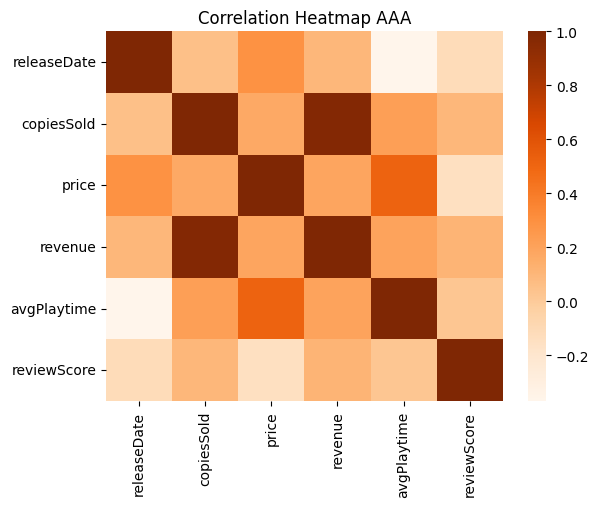

In [29]:
sns.heatmap(gamesdf_corr_aaa, cmap='Oranges')
plt.title('Correlation Heatmap AAA')
plt.show()

## Pearson Correlation - Indie

In [30]:
gamesdf_corr_indie = gamesdf_indie[['releaseDate','copiesSold','price','revenue','avgPlaytime','reviewScore']].corr(method = 'pearson').round(4)
gamesdf_corr_indie

,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore
releaseDate,1.0000,0.0004,0.0412,-0.0061,-0.0710,0.0746
copiesSold,0.0004,1.0000,-0.0640,0.2258,0.0482,0.0099
price,0.0412,-0.0640,1.0000,0.1226,-0.0658,-0.0069
revenue,-0.0061,0.2258,0.1226,1.0000,0.1940,0.0195
avgPlaytime,-0.0710,0.0482,-0.0658,0.1940,1.0000,-0.0814
reviewScore,0.0746,0.0099,-0.0069,0.0195,-0.0814,1.0000


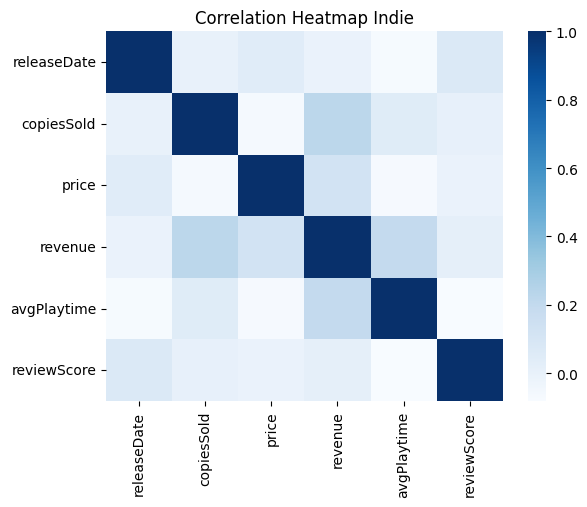

In [31]:
sns.heatmap(gamesdf_corr_indie, cmap='Blues')
plt.title('Correlation Heatmap Indie')
plt.show()

## Publisher Release Comparison

In [32]:
publisher_counts = gamesdf.publisherClass.value_counts()

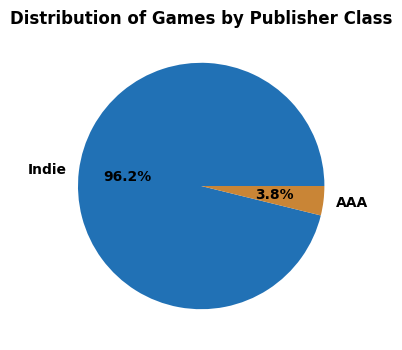

In [33]:
plt.figure(figsize=(6, 4))

plt.pie(gamesdf.publisherClass.value_counts(),
        labels=gamesdf.publisherClass.value_counts().index,
        autopct='%1.1f%%',
        colors=['#2171b5', '#C98536'],
        textprops={'fontweight': 'bold'})

plt.title('Distribution of Games by Publisher Class', fontweight='bold')
plt.show()

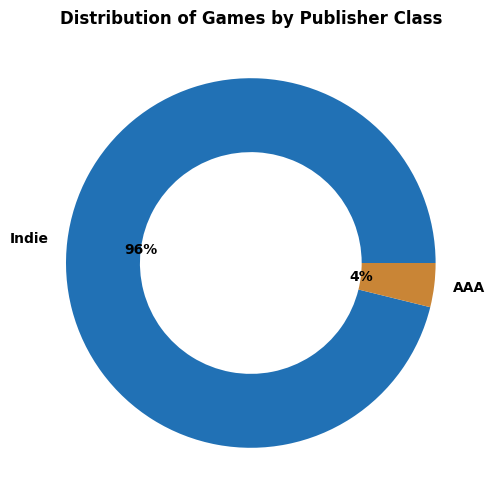

In [34]:
plt.figure(figsize=(6, 6))

plt.pie(publisher_counts, labels=publisher_counts.index, autopct='%1.0f%%',
        colors=['#2171b5', '#C98536'], textprops={'fontweight': 'bold'},
        wedgeprops={'width': 0.4})

plt.title('Distribution of Games by Publisher Class', fontweight='bold')
plt.show()

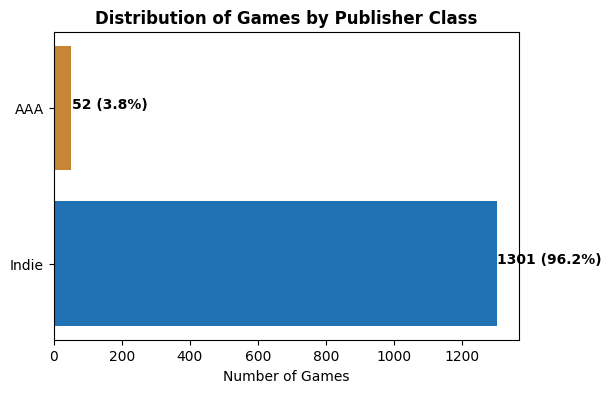

In [35]:
plt.figure(figsize=(6, 4))
publisher_counts = gamesdf.publisherClass.value_counts()

plt.barh(publisher_counts.index, publisher_counts, color=['#2171b5', '#C98536'])

for i, v in enumerate(publisher_counts):
    plt.text(v + 2, i, f'{v} ({(v/publisher_counts.sum())*100:.1f}%)', fontweight='bold')

plt.title('Distribution of Games by Publisher Class', fontweight='bold')
plt.xlabel('Number of Games')
plt.show()

I tried several graphs and decided to create a more visual one, where for every 100 games, 4 are AAA, as shown in class examples.

## Revenue per Publisher

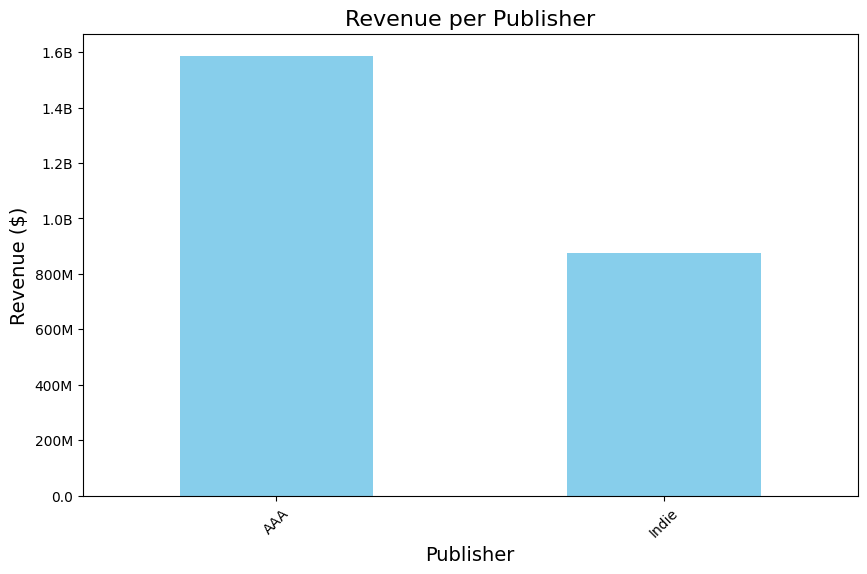

In [36]:
def billions(x, pos):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.0f}M'
    else:
        return f'{x}'


revenue_by_publisher = gamesdf.groupby('publisherClass')['revenue'].sum()


plt.figure(figsize=(10, 6))
revenue_by_publisher.plot(kind='bar', color='skyblue')


plt.title('Revenue per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)


plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))


plt.xticks(rotation=45)
plt.show()

In [37]:
top_aaa = gamesdf_aaa.groupby(['publishers', 'publisherClass'])[['revenue']].sum().sort_values(by='revenue', ascending=False).head(5)
top_indie = gamesdf_indie.groupby(['publishers', 'publisherClass'])[['revenue']].sum().sort_values(by='revenue', ascending=False).head(5)

combined_top = pd.concat([top_aaa, top_indie])

print(combined_top)

                                               revenue
publishers                 publisherClass             
Game Science               AAA             837793356.0
PlayStation Publishing LLC AAA             508885199.0
CAPCOM Co., Ltd.           AAA             117881025.0
Bandai Namco Entertainment AAA              45552937.0
Electronic Arts            AAA              21635263.0
Starry Studio              Indie            34530561.0
MADFINGER Games, a.s.      Indie            34030740.0
WarpFrog                   Indie            31266686.0
Playstack                  Indie            30980325.0
Nokta Games                Indie            26020639.0


In [38]:
combined_top.groupby('publisherClass')['revenue'].sum()

,revenue
publisherClass,
AAA,1.531748e+09
Indie,1.568290e+08


(array([0, 1]), [Text(0, 0, 'AAA'), Text(1, 0, 'Indie')])

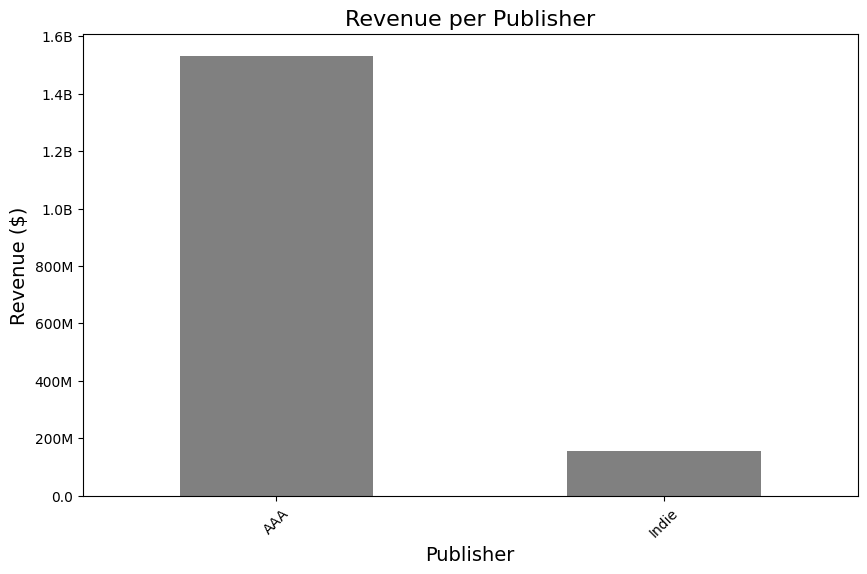

In [39]:
def billions(x, pos):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.0f}M'
    else:
        return f'{x}'

revenue_by_publisher = combined_top.groupby('publisherClass')['revenue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_publisher.plot(kind='bar', color='grey')

plt.title('Revenue per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)

plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.xticks(rotation=45)

# Used as base for another plt

I used the graphs as a proportional basis to create one in Photoshop that better fits the narrative.

## Scatter Plot (revenue)

### Scatter Plot (revenue)- AAA

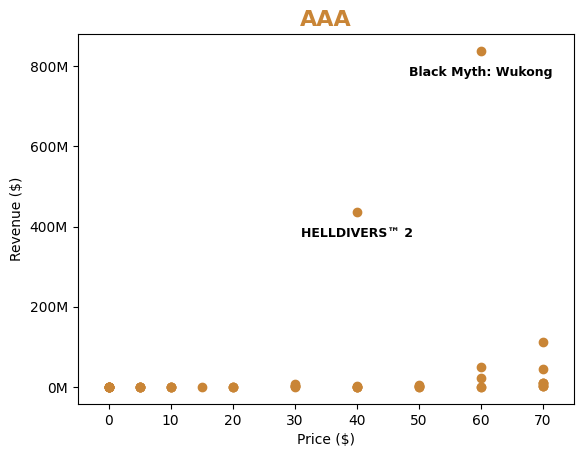

In [40]:
# Find the two points with the highest revenue
top_2_revenue_aaa = gamesdf_aaa.nlargest(2, 'revenue')

# Plot the scatter plot with the two highest revenue points labeled
plt.scatter(gamesdf_aaa['price'], gamesdf_aaa['revenue'], color='#C98536')
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')

# Set x-axis limit to 100
plt.xlim(-5,75)

# Format the y-axis to display values in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate the two points with the highest revenue with the game names
for index, row in top_2_revenue_aaa.iterrows():
    plt.annotate(f'{row["name"]}',
                 (row['price'], row['revenue']),
                 textcoords="offset points",
                 xytext=(0, -18),  # Adjust the position to improve readability
                 ha='center',
                 fontsize=9,
                 color='black',
                 fontweight='bold')

# Add title to the plot
plt.title('AAA', fontsize=16, fontweight='bold', color='#C98536')

# Remove the gridlines
plt.grid(False)

# Display the plot
plt.show()

### Scatter Plot (revenue) - Indie

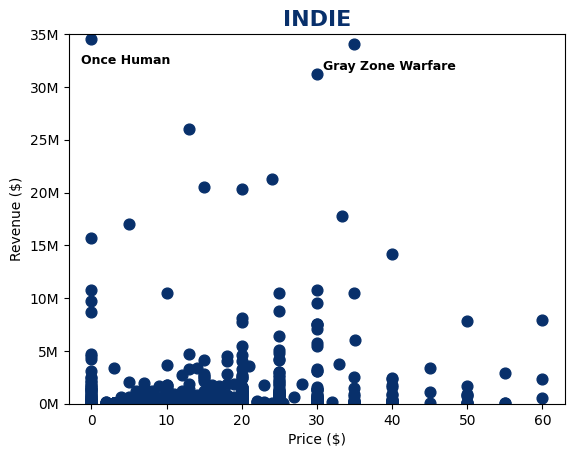

In [41]:
# Importing required libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Find the two points with the highest revenue
top_2_revenue_indie = gamesdf_indie.nlargest(2, 'revenue')

# Create the scatter plot with larger marker size
plt.scatter(gamesdf_indie['price'], gamesdf_indie['revenue'], color='#08306b', s=60)  # Adjust marker size with 's'

# Set axis labels
plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')

# Format the y-axis to display values in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Set y-axis limits for a more focused range
plt.ylim(0, 35e6)  # Adjusting y-axis to go up to 35M

# Annotate the two points with the highest revenue with the game names
for index, row in top_2_revenue_indie.iterrows():
    plt.annotate(f'{row["name"]}',
                 (row['price'], row['revenue']),
                 textcoords="offset points",
                 xytext=(25, -18),  # Adjust position for readability
                 ha='center',
                 fontsize=9,
                 color='black',
                 fontweight='bold')

# Add title to the plot
plt.title('INDIE', fontsize=16, fontweight='bold', color='#08306b')

# Remove the gridlines
plt.grid(False)

# Display the plot
plt.show()



## Revenue Over Time

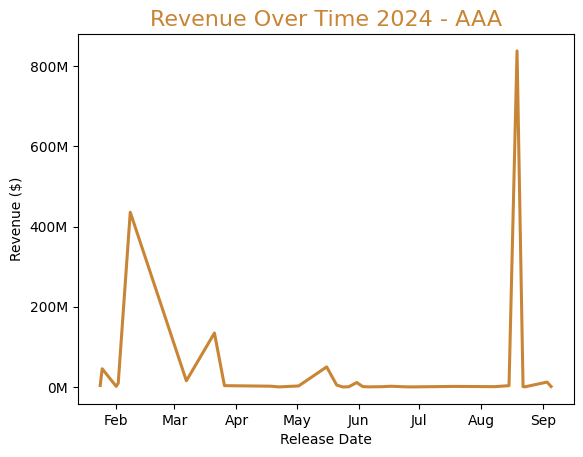

In [42]:
# Function to format the y-axis values in millions
def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)

fig, ax = plt.subplots()

# Plotting revenue data over time for AAA games
ax.plot(gamesdf_aaa.groupby('releaseDate')['revenue'].sum(),
        label='AAA', linewidth=2.2, color='#C98536')

# Setting the y-axis formatter to display revenue in millions
ax.yaxis.set_major_formatter(FuncFormatter(millions))

# Setting the x-axis formatter to display abbreviated month names
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Ensuring the x-axis ticks appear at monthly intervals
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Revenue Over Time 2024 - AAA', fontsize=16, color='#C98536')

# Adding labels for the axes
ax.set_xlabel('Release Date')
ax.set_ylabel('Revenue ($)')

plt.grid(False)

# Display the plot
plt.show()

In [43]:
pd.options.display.float_format = '{:,.2f}'.format
gamesdf.groupby('publisherClass')['revenue'].sum()

,revenue
publisherClass,
AAA,"1,586,597,652.00"
Indie,"877,029,653.81"


## Seasonality

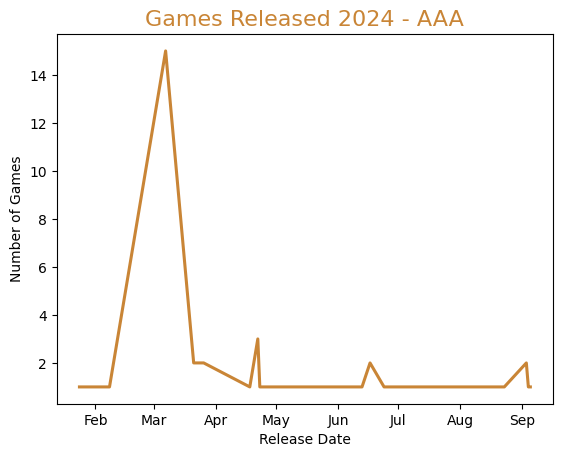

In [44]:
game_counter_aaa = gamesdf_aaa.groupby('releaseDate').size()

fig, ax = plt.subplots()
ax.plot(game_counter_aaa.index, game_counter_aaa.values, label='AAA', linewidth=2.2, color='#C98536')

# Setting the x-axis formatter to display abbreviated month names
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Ensuring the x-axis ticks appear at monthly intervals
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Games Released 2024 - AAA', fontsize=16, color='#C98536')

ax.set_xlabel('Release Date')
ax.set_ylabel('Number of Games')

plt.grid(False)

plt.show()

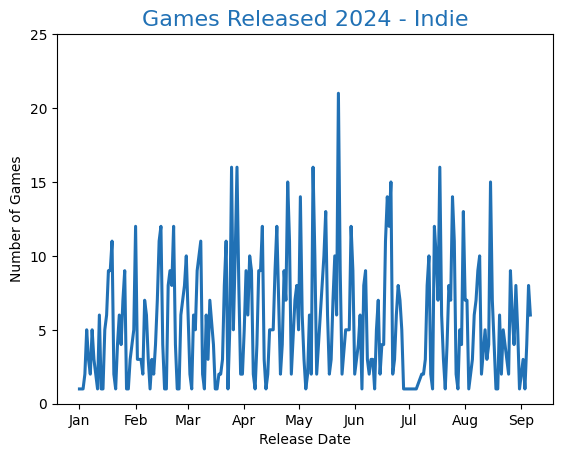

In [45]:
game_counter_indie = gamesdf_indie.groupby('releaseDate').size()

fig, ax = plt.subplots()
ax.plot(game_counter_indie.index, game_counter_indie.values, label='Indie', linewidth=2.2, color='#2171b5')

# Setting the x-axis formatter to display abbreviated month names
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.ylim(0,25)

# Ensuring the x-axis ticks appear at monthly intervals
ax.xaxis.set_major_locator(mdates.MonthLocator())


plt.title('Games Released 2024 - Indie', fontsize=16, color='#2171b5')

ax.set_xlabel('Release Date')
ax.set_ylabel('Number of Games')

plt.grid(False)

plt.show()

In [46]:
releases_publisher = gamesdf.groupby(['publishers','publisherClass'])['name'].count().reset_index()

releases_publisher.columns = ['publishers', 'Publisher Class','Number of Releases']

releases_publisher = releases_publisher.sort_values(by='Number of Releases', ascending=False)

print(releases_publisher)

                        publishers Publisher Class  Number of Releases
463                   Kagura Games           Indie                  17
261                Electronic Arts             AAA                  16
1                      072 Project           Indie                  14
933                        Ubisoft             AAA                  13
545   Mango Party,Mango Party News           Indie                  11
...                            ...             ...                 ...
389                      HeadArrow           Indie                   1
390                   HeartCoreDev           Indie                   1
391                  HeatPot Games           Indie                   1
393      Henteko Doujin,Sanuk Inc.           Indie                   1
1075                         雷鸣工作室           Indie                   1

[1076 rows x 3 columns]


## Boxplot - AAA and Indie

## Review Score (Scatter Plot and Boxplot)

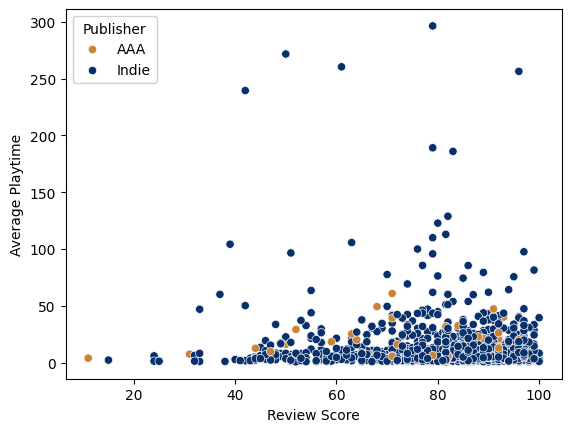

In [47]:
sns.scatterplot(data=gamesdf, x='reviewScore', y='avgPlaytime', hue='publisherClass', palette=custom_palette)

plt.xlabel('Review Score')
plt.ylabel('Average Playtime')
plt.legend(title='Publisher')

plt.legend(title='Publisher', frameon=True, framealpha=0.9, loc='best')


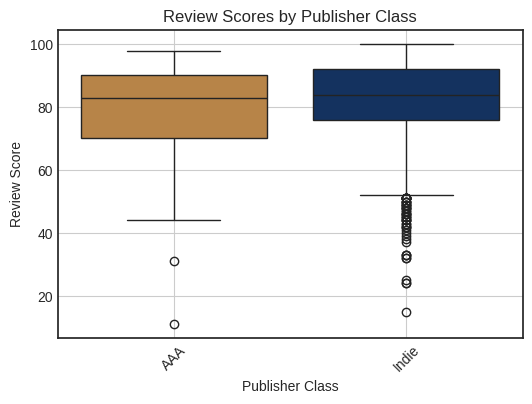

In [48]:
plt.style.use('seaborn-white')

plt.figure(figsize=(6, 4))
sns.boxplot(data=gamesdf, x='publisherClass', y='reviewScore', palette=custom_palette)
plt.title('Review Scores by Publisher Class')
plt.xlabel('Publisher Class')
plt.ylabel('Review Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Data Cleaning and Maintenance

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from datetime import datetime

In [50]:
gamesdf_ml = gamesdf.copy()

gamesdf_ml['releaseDate'] = pd.to_datetime(gamesdf_ml['releaseDate'])

today = datetime.now()

gamesdf_ml['releasedayscount'] = (today - gamesdf_ml['releaseDate']).dt.days

print(gamesdf_ml[['releaseDate', 'releasedayscount']])

     releaseDate  releasedayscount
0     2024-03-07               204
1     2024-07-25                64
2     2024-08-15                43
3     2024-06-14               105
5     2024-05-30               120
...          ...               ...
1490  2024-02-02               238
1491  2024-02-21               219
1495  2024-04-11               169
1496  2024-06-07               112
1499  2024-08-27                31

[1353 rows x 2 columns]


In [51]:
gamesdf_ml['playtimePerDay'] = gamesdf_ml['avgPlaytime']/gamesdf_ml['releasedayscount']
print(gamesdf_ml[['releasedayscount', 'avgPlaytime', 'playtimePerDay']])

      releasedayscount  avgPlaytime  playtimePerDay
0                  204        42.37            0.21
1                   64        29.65            0.46
2                   43        12.45            0.29
3                  105        24.80            0.24
5                  120        95.70            0.80
...                ...          ...             ...
1490               238        15.86            0.07
1491               219        18.18            0.08
1495               169        14.49            0.09
1496               112        31.97            0.29
1499                31        30.16            0.97

[1353 rows x 3 columns]


I created the variable playtimePerDay to account for potential bias in the avgPlaytime variable during the machine learning process. Games that were released recently have had less time to accumulate average playtime, which could skew the results. By normalizing the average playtime with the number of days available, playtimePerDay provides a fairer comparison between games released at different times

In [52]:
gamesdf_ml = gamesdf_ml.drop(columns=['avgPlaytime', 'releasedayscount'])

I removed the columns avgPlaytime and daysAvailable to avoid multicollinearity in the machine learning process. The new variable playtimePerDay already incorporates both the average playtime and the number of days the game has been available, making the other two columns redundant. Keeping them could introduce bias or confusion in the model

In [53]:
gamesdf_ml['playtimePerDay'].max()

11.651591035093674

In [54]:
# Define the limits for the categories
bins = [0, 60, 80, 100]  # Limits for 'Low', 'Medium', and 'High'
labels = ['Low', 'Medium', 'High']  # Names of the categories

# Discretize the 'reviewScore' values into categories
gamesdf_ml['reviewScoreClass'] = pd.cut(gamesdf_ml['reviewScore'], bins=bins, labels=labels)

print(gamesdf_ml[['reviewScore', 'reviewScoreClass']])
gamesdf_ml['reviewScoreClass'].value_counts()

      reviewScore reviewScoreClass
0           71.00           Medium
1           57.00              Low
2           88.00             High
3           76.00           Medium
5           79.00           Medium
...           ...              ...
1490        72.00           Medium
1491        81.59             High
1495        73.00           Medium
1496        74.00           Medium
1499        82.00             High

[1353 rows x 2 columns]


,count
reviewScoreClass,
High,875
Medium,371
Low,107


I created the reviewScoreClass column to transform continuous reviewScore values into discrete categories (Low, Medium, High) to better prepare the data for classification in machine learning.

## Outliers (Z-score method)

In [55]:
#Finding the limits

upper_limit = gamesdf_ml['revenue'].mean() + 3*gamesdf_ml['revenue'].std()
lower_limit = gamesdf_ml['revenue'].mean() - 3*gamesdf_ml['revenue'].std()

print(upper_limit)
print(lower_limit)

79817265.67995727
-76175540.17247865


In [56]:
#Finding the outliers

gamesdf_ml.loc[(gamesdf_ml['revenue'] > upper_limit) | (gamesdf_ml['revenue'] < lower_limit)]

,name,releaseDate,copiesSold,price,revenue,reviewScore,publisherClass,publishers,developers,steamId,playtimePerDay,reviewScoreClass
1450,Black Myth: Wukong,2024-08-19,15517278,59.99,"837,793,356.00",96.00,AAA,Game Science,Game Science,2358720,0.51,High
1451,HELLDIVERS™ 2,2024-02-08,11905198,39.99,"435,635,596.00",71.00,AAA,PlayStation Publishing LLC,Arrowhead Game Studios,553850,0.17,Medium
1454,Dragon's Dogma 2,2024-03-21,1785028,69.99,"111,478,291.00",81.59,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",2054970,0.17,High


In [57]:
# Deleting the outliers

gamesdf_ml_nooutliers = gamesdf_ml.loc[(gamesdf_ml['revenue'] < upper_limit) & (gamesdf_ml['revenue'] > lower_limit)]

print ('Before outliers removal: ', len(gamesdf_ml))
print('New dataframe: ', len(gamesdf_ml_nooutliers))
print('Outliers: ', len(gamesdf_ml) - len(gamesdf_ml_nooutliers))

Before outliers removal:  1353
New dataframe:  1350
Outliers:  3


In [58]:
#Finding the limits

upper_limit = gamesdf_ml_nooutliers['price'].mean() + 3*gamesdf_ml_nooutliers['price'].std()
lower_limit = gamesdf_ml_nooutliers['price'].mean() - 3*gamesdf_ml_nooutliers['price'].std()

print(upper_limit)
print(lower_limit)

49.701704150297346
-17.62357081696401


In [59]:
#Finding the outliers

gamesdf_ml_nooutliers.loc[(gamesdf_ml_nooutliers['price'] > upper_limit) | (gamesdf_ml_nooutliers['price'] < lower_limit)]

,name,releaseDate,copiesSold,price,revenue,reviewScore,publisherClass,publishers,developers,steamId,playtimePerDay,reviewScoreClass
0,WWE 2K24,2024-03-07,165301,99.99,"8,055,097.00",71.00,AAA,2K,Visual Concepts,2315690,0.21,Medium
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,"7,882,151.00",57.00,Indie,D3PUBLISHER,SANDLOT,2291060,0.46,Low
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,"7,815,247.00",88.00,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940,0.29,High
21,Senua’s Saga: Hellblade II,2024-05-21,107010,49.99,"4,747,832.00",88.00,AAA,Xbox Game Studios,Ninja Theory,2461850,0.04,High
38,Apollo Justice: Ace Attorney Trilogy,2024-01-24,89327,49.99,"3,465,018.00",93.00,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",2187220,0.16,High
48,EA SPORTS™ Madden NFL 25,2024-08-15,50521,69.99,"3,182,368.00",50.00,AAA,Electronic Arts,Tiburon,2582560,0.37,Low
155,Baten Kaitos I & II HD Remaster,2024-06-17,4662,49.99,"178,950.00",84.00,AAA,Bandai Namco Entertainment,"logicalbeat Co., Ltd.",2146170,0.13,High
233,KONOSUBA - God's Blessing on this Wonderful Wo...,2024-02-07,3261,49.99,"133,582.00",90.00,Indie,PQube,MAGES. Inc.,2349140,0.05,High
290,Spirit Hunter: Death Mark II,2024-02-15,2783,49.99,"111,912.00",98.00,Indie,Aksys Games,"EXPERIENCE,Ghostlight LTD",2080800,0.05,High
365,TOKYO PSYCHODEMIC,2024-05-29,1813,54.99,"89,539.00",24.00,Indie,GRAVITY,GRAVITY GAME ARISE,2397140,0.05,Low


In [60]:
# Deleting the outliers

gamesdf_ml_nooutliers_final = gamesdf_ml_nooutliers.loc[(gamesdf_ml_nooutliers['price'] < upper_limit) & (gamesdf_ml_nooutliers['price'] > lower_limit)]

print ('Before outliers removal: ', len(gamesdf_ml_nooutliers))
print('New dataframe: ', len(gamesdf_ml_nooutliers_final))
print('Outliers: ', len(gamesdf_ml_nooutliers) - len(gamesdf_ml_nooutliers_final))

Before outliers removal:  1350
New dataframe:  1318
Outliers:  32


## Normalization

In [61]:
columns_to_normalize = ['copiesSold', 'price',	'revenue', 'playtimePerDay',	'reviewScore']

scaler = MinMaxScaler()

gamesdf_normalized = gamesdf_ml_nooutliers_final.copy()

gamesdf_normalized['publisherClass'] = gamesdf_normalized['publisherClass'].map({'AAA': 1, 'Indie': 0})

gamesdf_normalized[columns_to_normalize] = scaler.fit_transform(gamesdf_normalized[columns_to_normalize])

print(gamesdf_normalized)

                     name releaseDate  copiesSold  price  revenue  \
3        Legend of Mortal  2024-06-14        0.01   0.44     0.22   
5                Soulmask  2024-05-30        0.01   0.67     0.22   
6           The Universim  2024-01-22        0.01   0.67     0.22   
7              Bellwright  2024-04-23        0.01   0.67     0.22   
8       Night of the Dead  2024-05-31        0.01   0.67     0.20   
...                   ...         ...         ...    ...      ...   
1489         Lust Goddess  2024-02-21        0.01   0.00     0.28   
1491        Pacific Drive  2024-02-21        0.01   0.67     0.28   
1495  Infection Free Zone  2024-04-11        0.01   0.56     0.25   
1496      Dark and Darker  2024-06-07        0.09   0.00     0.25   
1499               Peglin  2024-08-27        0.02   0.44     0.23   

      reviewScore  publisherClass                     publishers  \
3            0.73               0    Paras Games,Obb Studio Inc.   
5            0.76               0  

In [62]:
# Removing non necessary string and date columns

columns_to_remove = ['name', 'publishers', 'developers', 'steamId', 'releaseDate']

gamesdf_ml_ready = gamesdf_normalized.drop(columns=columns_to_remove)

print(gamesdf_ml_ready)

      copiesSold  price  revenue  reviewScore  publisherClass  playtimePerDay  \
3           0.01   0.44     0.22         0.73               0            0.02   
5           0.01   0.67     0.22         0.76               0            0.07   
6           0.01   0.67     0.22         0.79               0            0.01   
7           0.01   0.67     0.22         0.75               0            0.02   
8           0.01   0.67     0.20         0.76               0            0.02   
...          ...    ...      ...          ...             ...             ...   
1489        0.01   0.00     0.28         0.42               0            0.01   
1491        0.01   0.67     0.28         0.79               0            0.01   
1495        0.01   0.56     0.25         0.70               0            0.01   
1496        0.09   0.00     0.25         0.71               0            0.02   
1499        0.02   0.44     0.23         0.80               0            0.08   

     reviewScoreClass  
3  

## Model Training

In [63]:
# Separating features (X) and target (y)
X = gamesdf_ml_ready.drop(columns=['reviewScore', 'reviewScoreClass'])
y = gamesdf_ml_ready['reviewScoreClass']

In [64]:
# Splitting the data into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [65]:
# Scaling the data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Training the RandomForestClassifier

model = RandomForestClassifier(random_state=17)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [67]:
# Making predictions on the test set

y_pred = model.predict(X_test)

## Evaluating the model

In [68]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[149   0  18]
 [ 17   2   5]
 [ 55   0  18]]


In [69]:
# Accuracy score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6401515151515151


In [70]:
# Classification report (includes precision, recall, and F1-score)

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.89      0.77       167
         Low       1.00      0.08      0.15        24
      Medium       0.44      0.25      0.32        73

    accuracy                           0.64       264
   macro avg       0.70      0.41      0.41       264
weighted avg       0.64      0.64      0.59       264

